In [25]:
import sys
sys.path.append('../')

import torch
import matplotlib.pyplot as plt

from src.dataset import get_dataloaders
from src.model import get_model
from src.transform import get_transforms

In [27]:
input_size = (320, 480)
transforms = get_transforms(input_size)
_, _, test_dl = get_dataloaders("../data", batch_size=1, num_workers=0, transforms=transforms)

def visualize(x, pred):
    x = x.squeeze(0).permute(1, 2, 0).numpy()
    pred = pred.squeeze(0).permute(1, 2, 0).numpy()
    car = x * pred
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(x)
    axs[1].imshow(pred)
    axs[2].imshow(car)
    plt.show()
    
model = get_model("unet")
model.load_state_dict(torch.load("../output/unet_20230604092756_63.pth", map_location="cpu")['model_state_dict'])
model.eval()

UNet(
  (encoder1): Sequential(
    (enc1_conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1_norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1_relu1): ReLU(inplace=True)
    (enc1_conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1_norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1_relu2): ReLU(inplace=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (encoder2): Sequential(
    (enc2_conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2_norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc2_relu1): ReLU(inplace=True)
    (enc2_conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2_norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affin

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


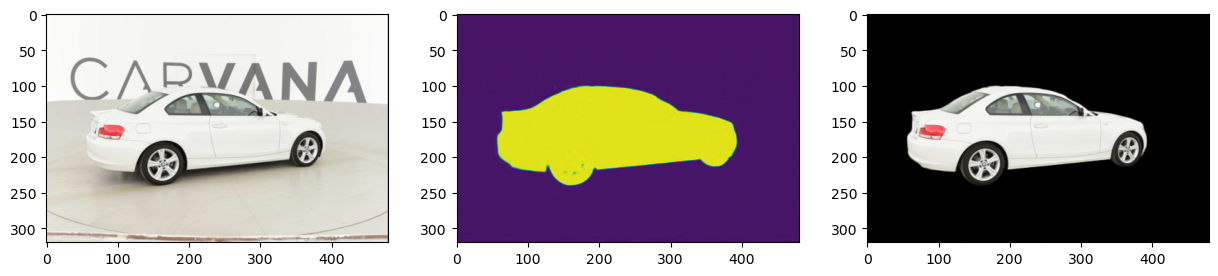

In [33]:
x = test_dl.dataset[123]
with torch.no_grad():
    pred = model(x.unsqueeze(0))
visualize(x, pred)